# The Sparks Foundation
GRIP(Graduate Rotational Internship Program April-2024)

NAME : AKSHAY KUMAR SINGH

Domain : Data Science and Business Analytics

Task 6 :Prediction using Decision Tree Algorithm

Problem Statement : 
    
1-Create the Decision Tree classifier and visualize it graphically.

2-The purpose is if we feed any new data to this classifier, it would be able to predict the right class accordingly.

In [59]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier as dt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import sklearn.metrics as sm
from sklearn.tree import plot_tree

In [20]:
iris = pd.read_csv(r"C:\Users\msian\Downloads\Iris.csv")
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# Dropping the Unncessary Column

In [21]:
iris.drop(labels= "Id" ,axis=1 ,inplace=True)

# Checking the info of dataset

In [22]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


# Checking for null values

In [60]:
iris.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

No null values found.

# Descriptive Statistics

In [61]:
iris.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Average Sepal Length 5.8433 & Average Sepal Width 3.0540

Average Petal Length 3.7586 & Average Petal Width 1.1986

In [62]:
# Checking correlation 
cols = iris[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
correlation = cols.corr()
correlation

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


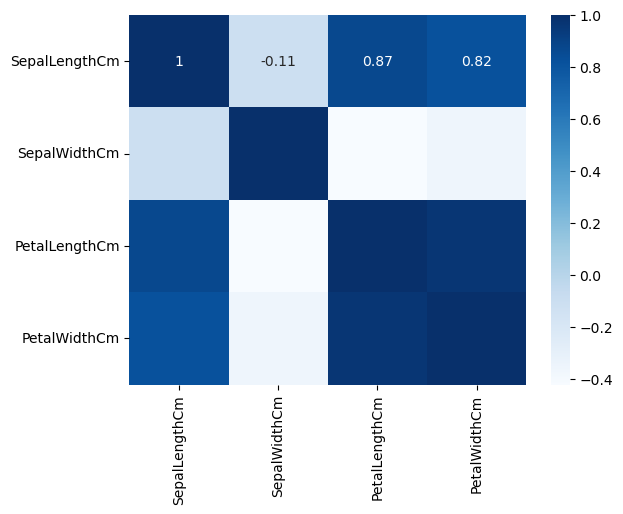

In [63]:
sns.heatmap(correlation,xticklabels =correlation.columns, yticklabels = correlation.columns, annot = True, cmap = 'Blues')
plt.show()

1-The correlation between SepalLengthCm and PetalLengthCm is 0.87, indicating a strong positive correlation.

2-The correlation between SepalLengthCm and PetalWidthCm is 0.82, also indicating a strong positive correlation.

3-The correlation between SepalWidthCm and PetalLengthCm is -0.42, indicating a moderate negative correlation.

4-The correlation between SepalWidthCm and PetalWidthCm is -0.36, indicating a moderate negative correlation.

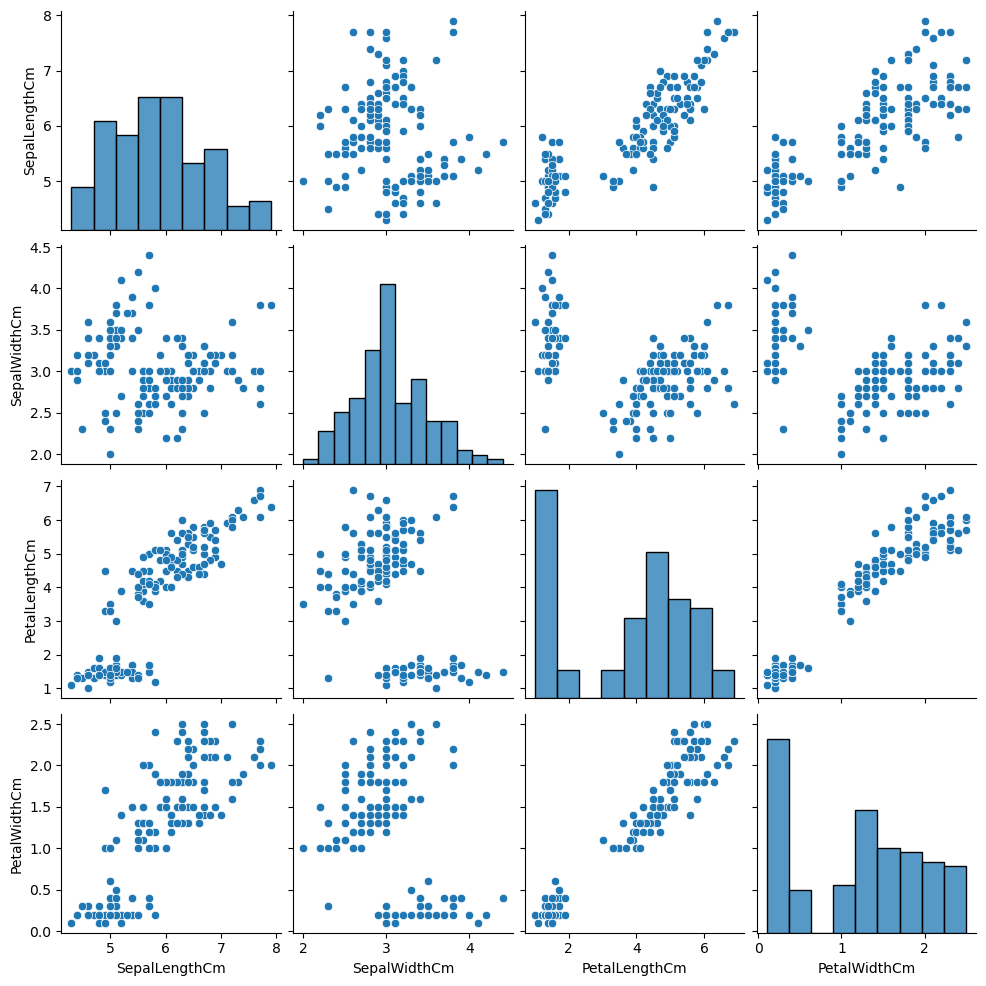

In [64]:
sns.pairplot(data=iris)

In [65]:
x= iris.iloc[:,:-1].values 
y=iris.iloc[:,-1].values

In [66]:
from sklearn.preprocessing import LabelEncoder

In [67]:
y

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versic

In [68]:
lab = LabelEncoder()
y= lab.fit_transform(y)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [69]:
#spliting into training and test set

from sklearn.model_selection import train_test_split as tts

x_train, x_test, y_train, y_test = tts(x, y, train_size=0.8, random_state=1)

x_train.shape, x_test.shape, y_train.shape, y_test.shape 

((120, 4), (30, 4), (120,), (30,))

In [70]:
#training the model

from sklearn.tree import DecisionTreeClassifier as dt

classifier= dt(class_weight='balanced')
classifier.fit(x_train, y_train)

y_pred= classifier.predict(x_test)

In [71]:
y_pred

array([0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       2, 0, 2, 1, 0, 0, 1, 2])

In [72]:
y_test

array([0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 2, 1, 0, 0, 1, 2])

In [73]:
data = pd.DataFrame({'Actual':y_test, 'Predicted': y_pred})
data.head()

,Actual,Predicted
0,0,0
1,1,1
2,1,1
3,0,0
4,2,2


In [74]:
#Confusion Matrix

from sklearn.metrics import confusion_matrix, accuracy_score

cm= confusion_matrix(y_test,y_pred)
cm

array([[11,  0,  0],
       [ 0, 12,  1],
       [ 0,  0,  6]], dtype=int64)

In [75]:
#accuracy score

accuracy_score(y_test,y_pred)

0.9666666666666667

In [76]:
fn=['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
cn=['setosa', 'versicolor', 'virginica']

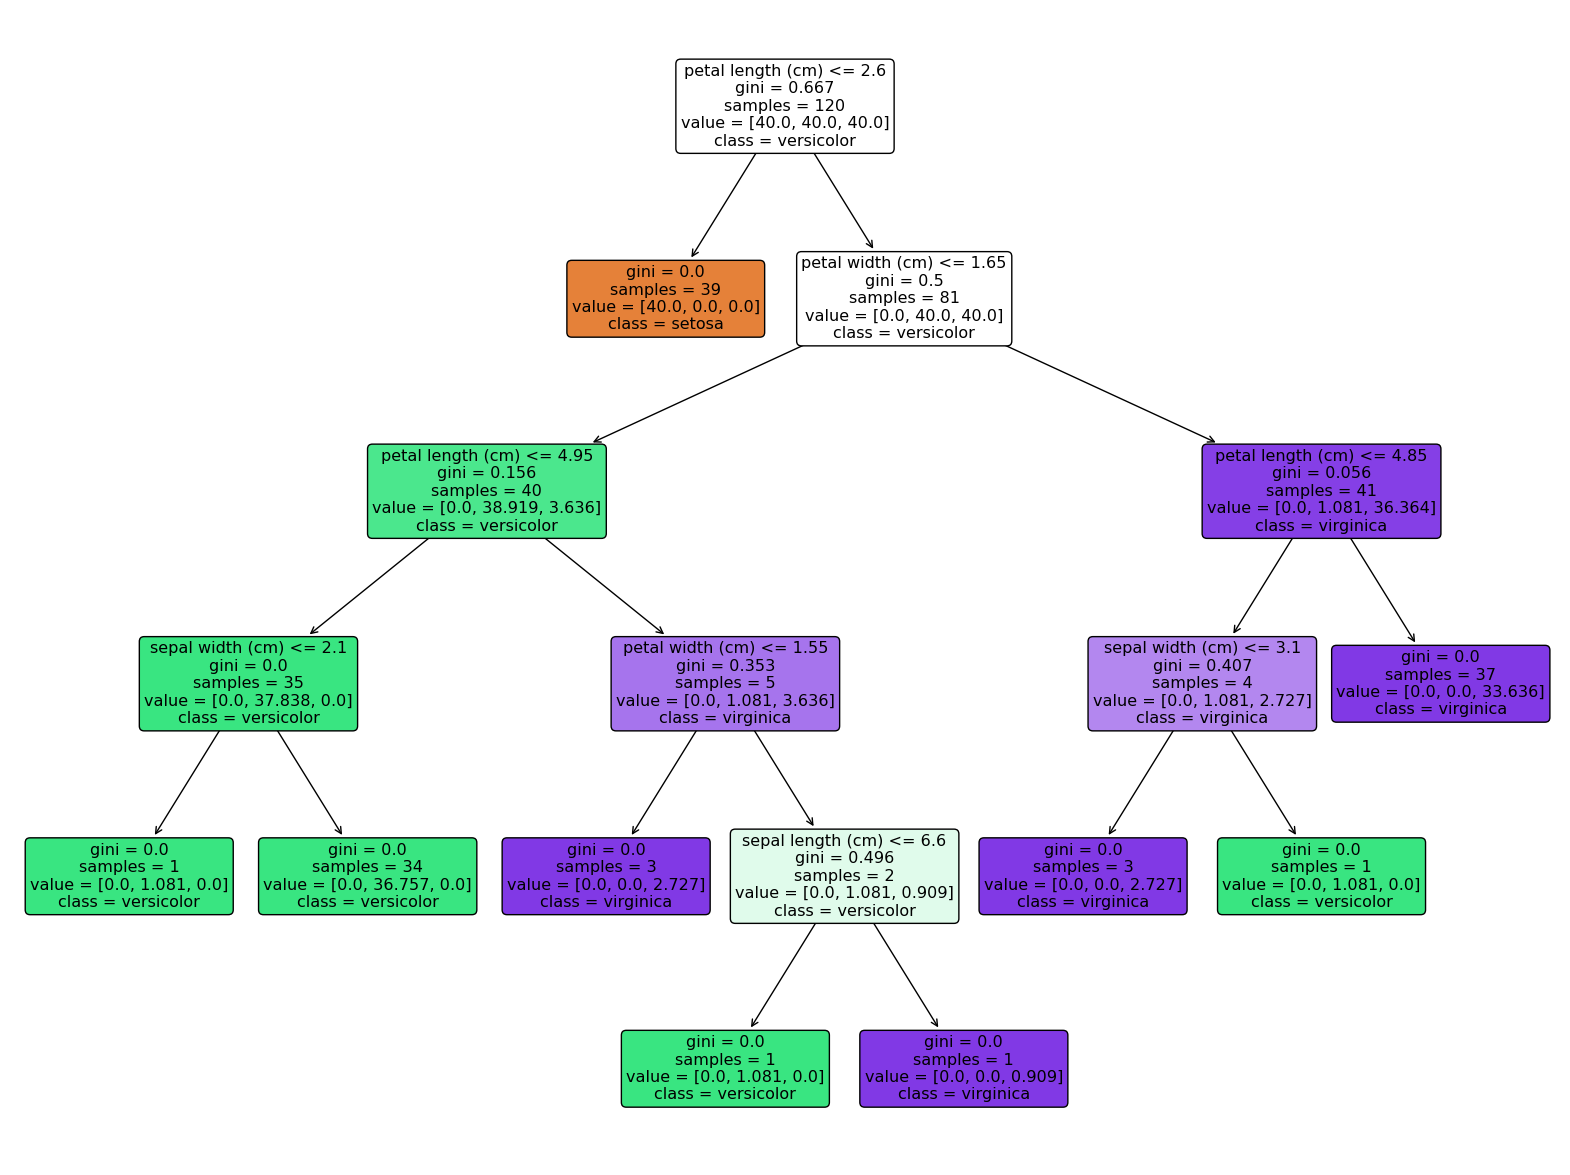

In [77]:
plt.figure(figsize=(20,15))
plot_tree(classifier, feature_names=fn, class_names=cn, filled=True, rounded=True)
plt.show()